In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [2]:
data = pd.read_csv("data/total_add_velocity_weighted_average.csv")

In [3]:
reg = data.copy()
reg = reg.iloc[:,4:10]

In [4]:
reg

,water_u,water_v,wind_u,wind_v,d_long,d_lati
0,0.089673,0.041876,4.087482,-1.265760,0.090988,0.070000
1,0.095552,0.053962,3.988419,-1.597433,0.112015,0.041000
2,0.113870,0.135307,1.290056,0.333414,0.009995,-0.028999
3,0.259294,0.156671,5.640256,8.854036,0.102005,0.050999
4,0.368874,0.064946,13.505250,7.603525,0.086990,-0.024002
...,...,...,...,...,...,...
15809,0.076116,-0.035941,3.090491,1.099326,0.029999,-0.000999
15810,0.075121,-0.036927,1.551420,2.108921,-0.041992,-0.029999
15811,0.081807,-0.019462,1.289979,4.271356,-0.057007,0.008999
15812,0.081604,-0.005729,0.537444,4.900105,0.072998,0.054001


In [5]:
correlation_matrix = reg.corr()

In [6]:
correlation_matrix

,water_u,water_v,wind_u,wind_v,d_long,d_lati
water_u,1.000000,0.019496,0.519768,0.286093,0.515460,0.049697
water_v,0.019496,1.000000,-0.332902,0.480076,0.034458,0.552882
wind_u,0.519768,-0.332902,1.000000,-0.027316,0.130156,-0.055697
wind_v,0.286093,0.480076,-0.027316,1.000000,0.097256,0.125325
d_long,0.515460,0.034458,0.130156,0.097256,1.000000,0.061713
d_lati,0.049697,0.552882,-0.055697,0.125325,0.061713,1.000000


C:\Users\lg\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


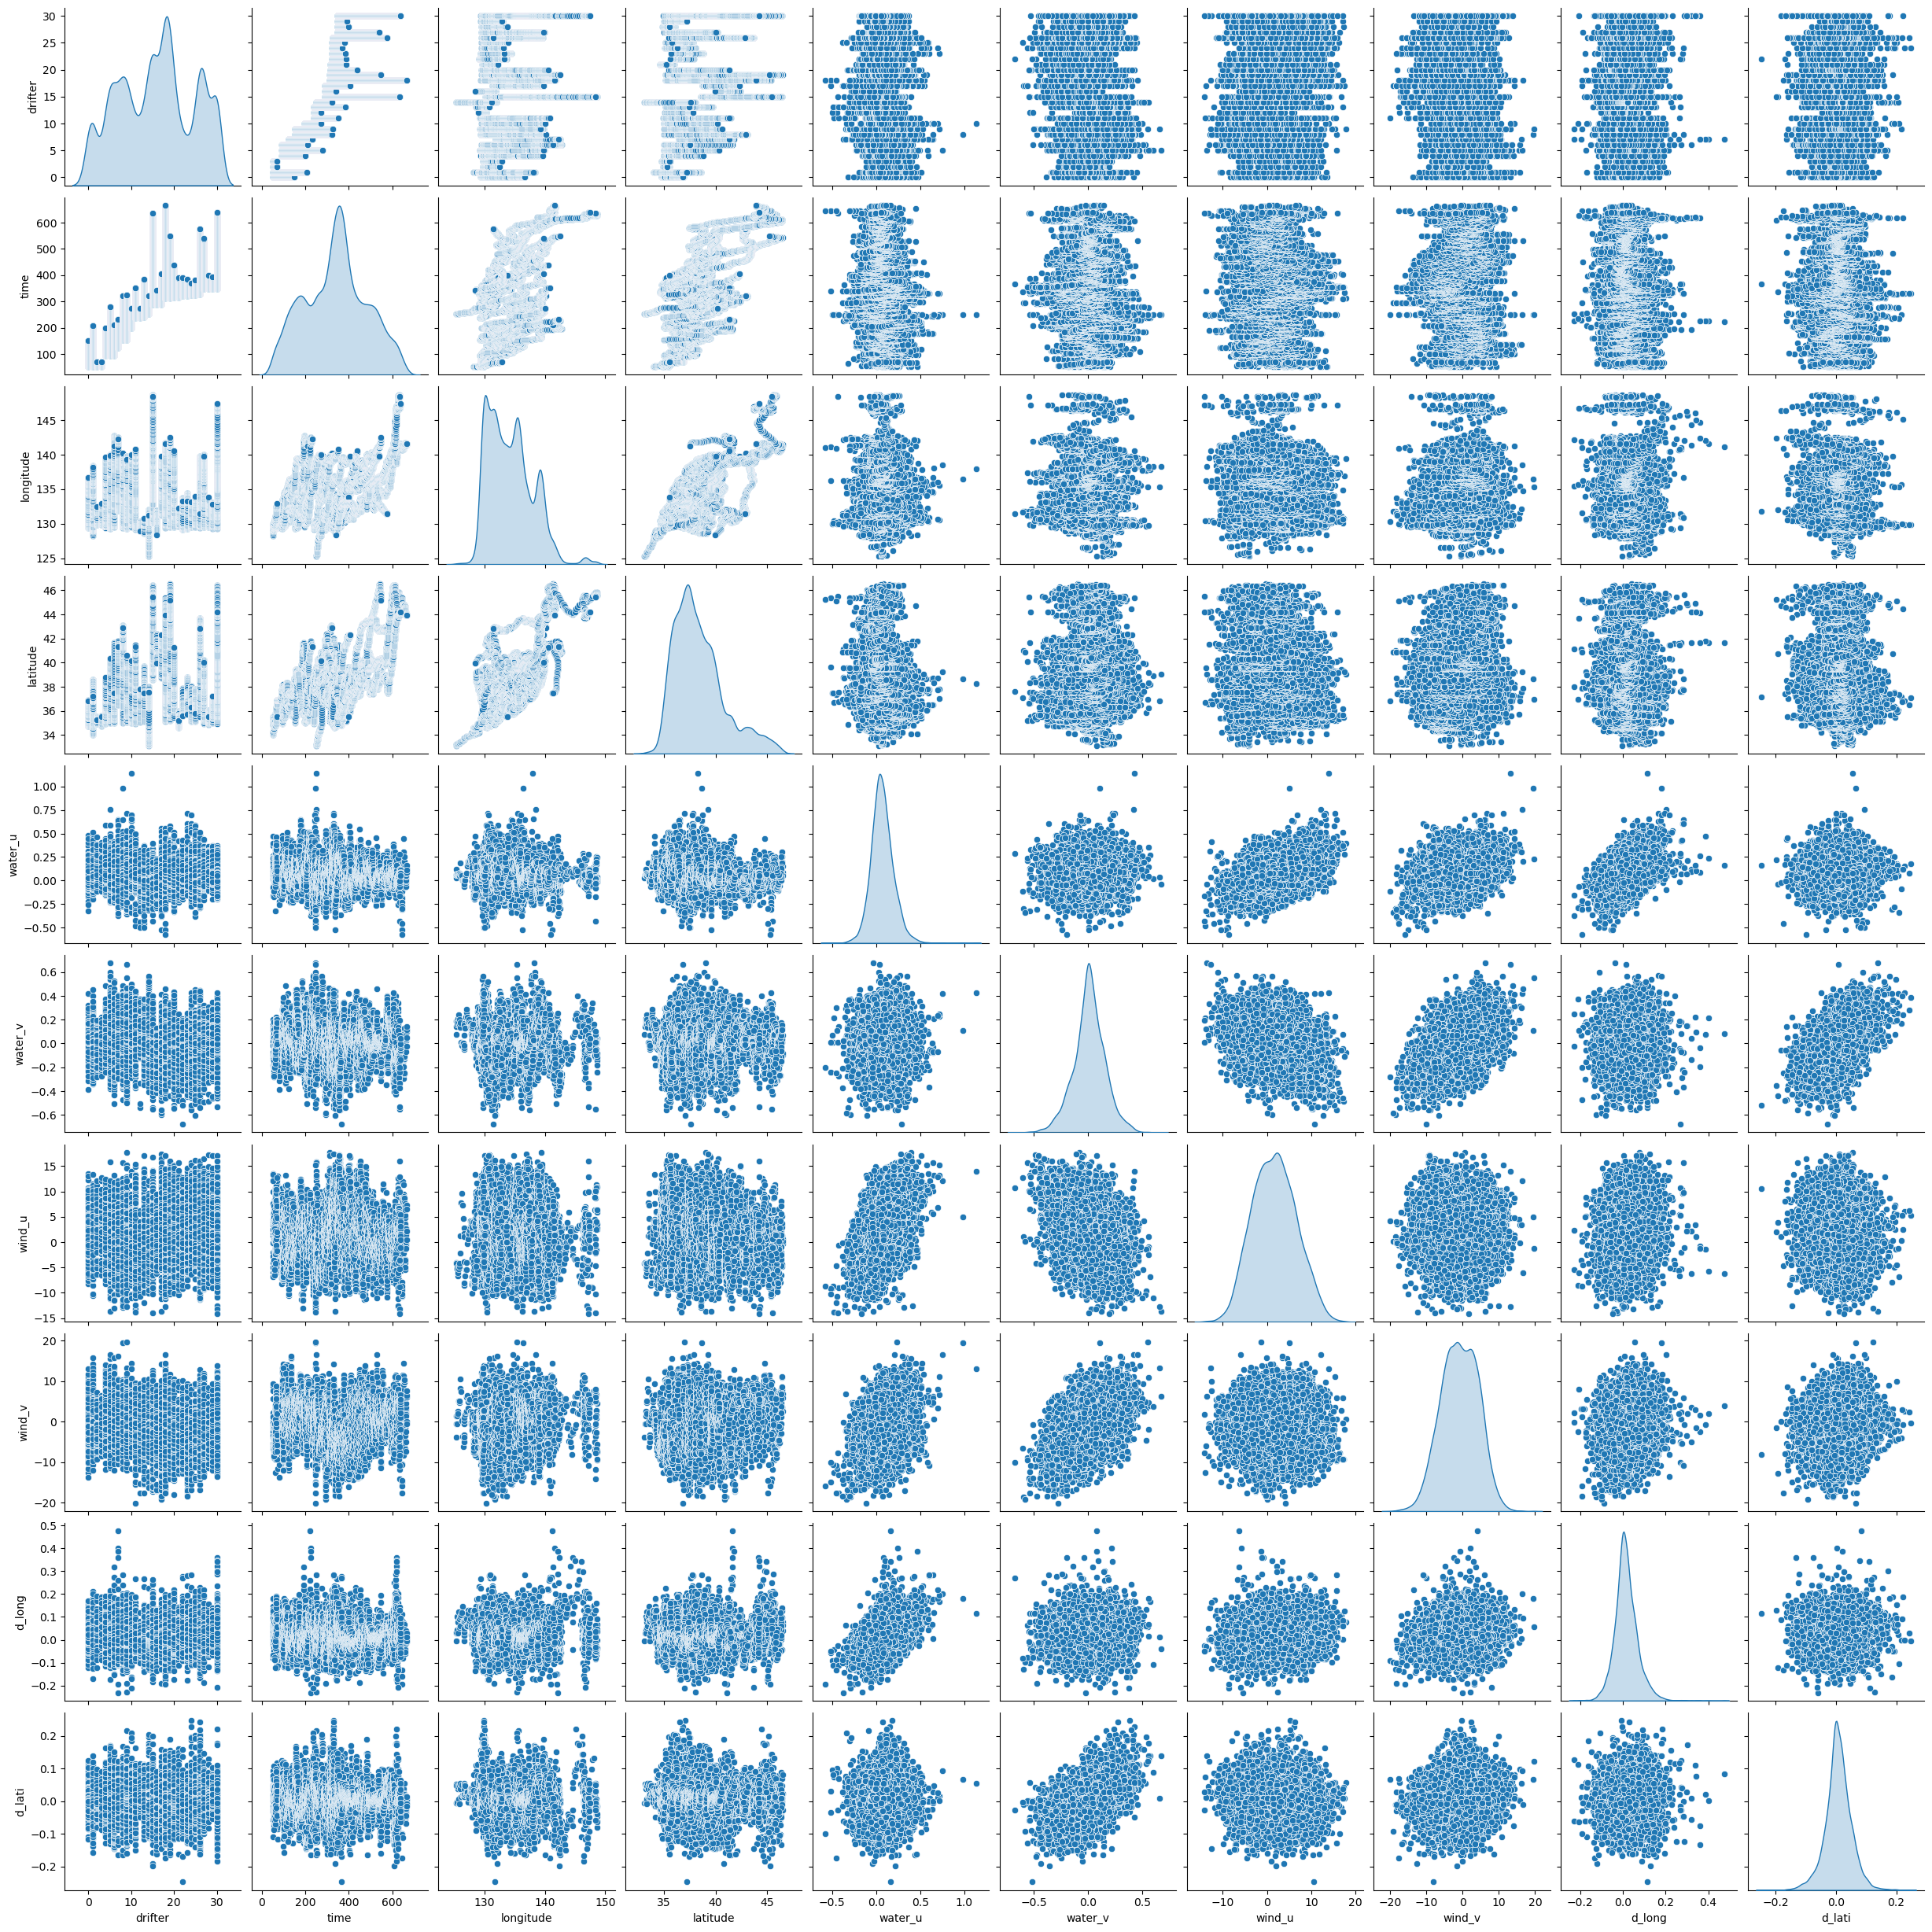

In [7]:
# pair plot
sns.pairplot(data, diag_kind='kde')
plt.show()

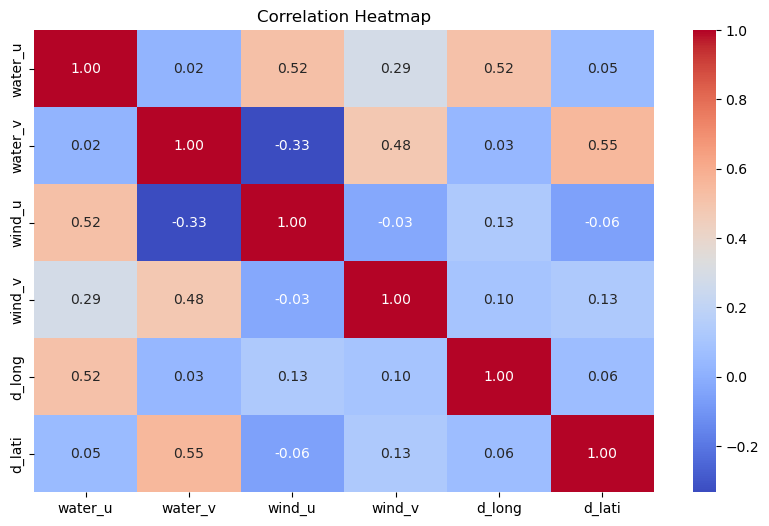

In [8]:
# heat map
plt.figure(figsize=(10, 6))  # 그림의 크기 설정
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# d_long

In [8]:
X = reg[['water_u', 'water_v', 'wind_u', 'wind_v']]
y_long = reg['d_long']

In [9]:
X_long = sm.add_constant(X)
model_long = sm.OLS(y_long, X_long).fit()

In [10]:
print(model_long.summary())

                            OLS Regression Results                            
Dep. Variable:                 d_long   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     1691.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:35:36   Log-Likelihood:                 26684.
No. Observations:               15814   AIC:                        -5.336e+04
Df Residuals:                   15809   BIC:                        -5.332e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0007      0.000     -1.711      0.0

# d_lati

In [11]:
X = reg[['water_u', 'water_v', 'wind_u', 'wind_v']]
y_lati = reg['d_lati']

In [12]:
X_lati = sm.add_constant(X)
model_lati = sm.OLS(y_lati, X_lati).fit()

In [13]:
print(model_lati.summary())

                            OLS Regression Results                            
Dep. Variable:                 d_lati   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     2205.
Date:                Fri, 06 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:35:36   Log-Likelihood:                 30592.
No. Observations:               15814   AIC:                        -6.117e+04
Df Residuals:                   15809   BIC:                        -6.114e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.508      0.6

# RMSE

In [14]:
def calculate_rmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return rmse

In [15]:
y_long_pred = model_long.predict(X_long)
y_lati_pred = model_lati.predict(X_lati)

rmse_long = calculate_rmse(y_long, y_long_pred)
rmse_lati = calculate_rmse(y_lati, y_lati_pred)

print(f"RMSE for d_long: {rmse_long:.4f}")
print(f"RMSE for d_lati: {rmse_lati:.4f}")

RMSE for d_long: 0.0448
RMSE for d_lati: 0.0350
